In [82]:
import pandas as pd
housing=pd.read_csv("C://Users//PC//Desktop//ml//housing.csv")

In [83]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [86]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


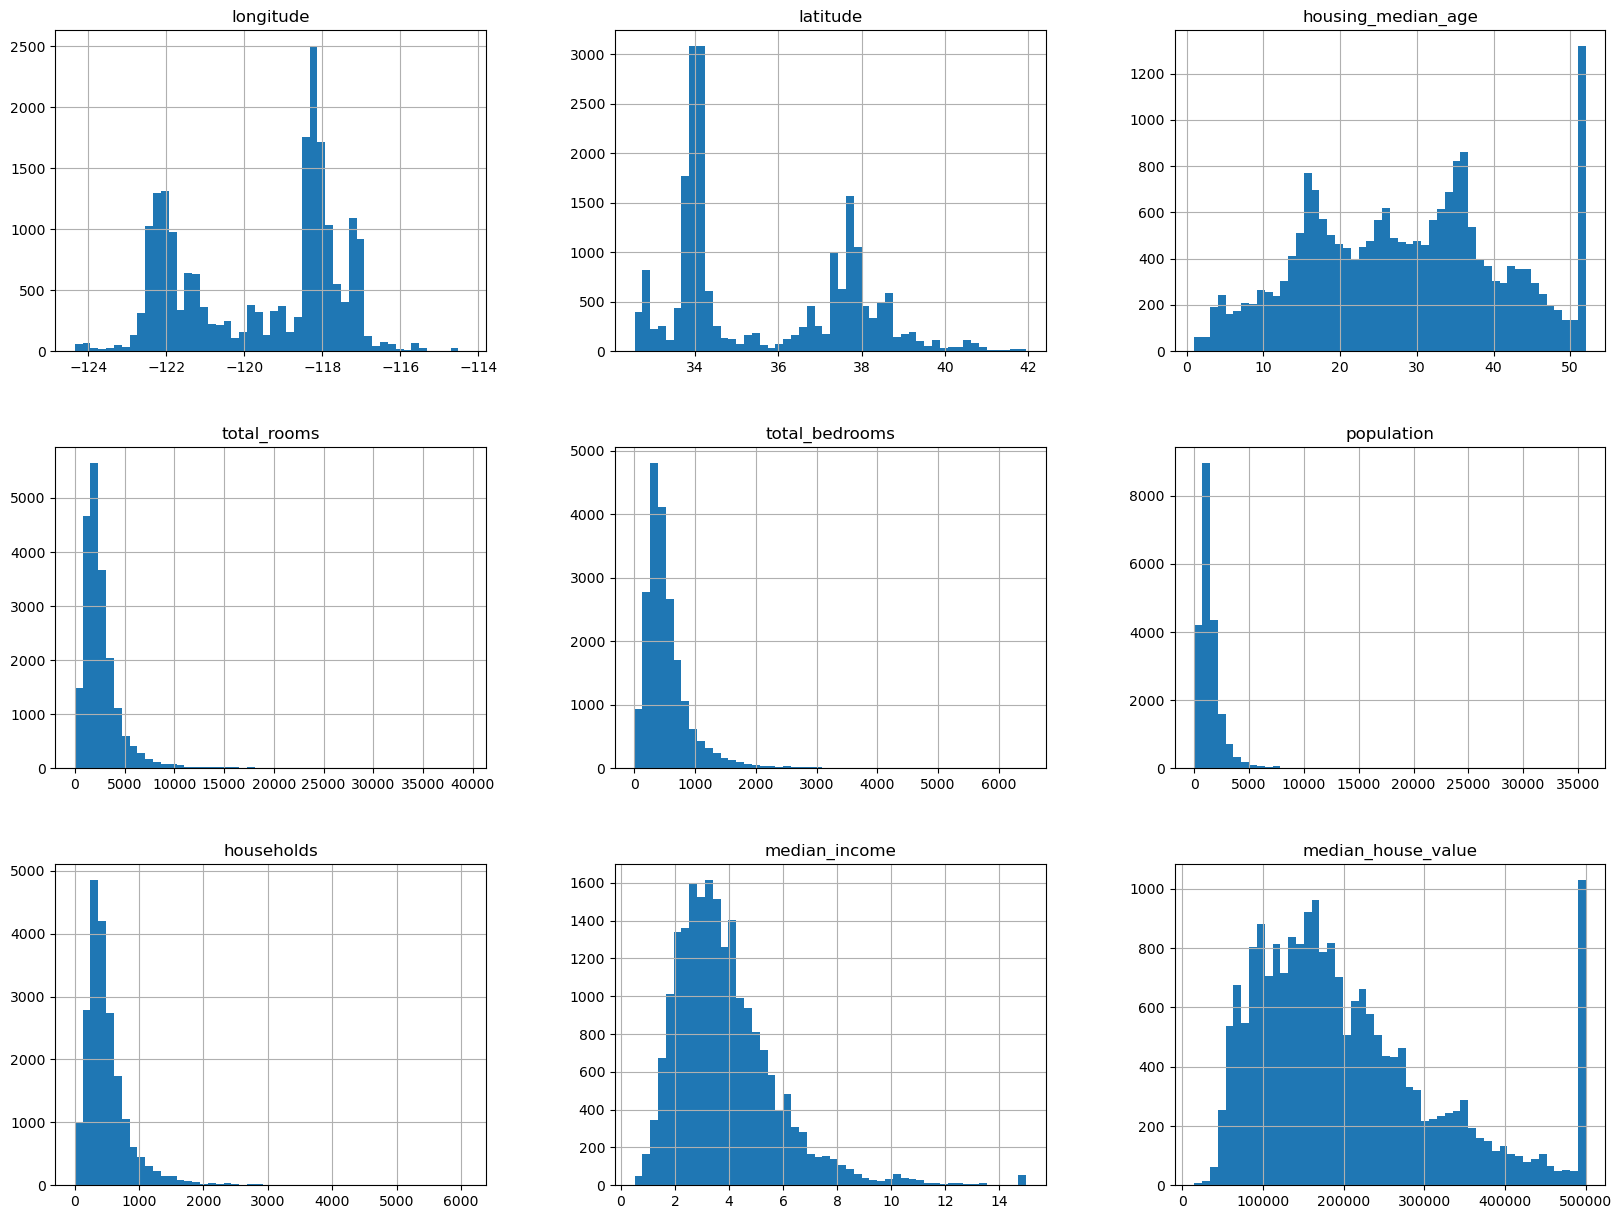

In [87]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

bins - liczba słupków w histogramie

<div style="text-align: justify">
    
1. First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$ 30.000). Working with preprocessed attributes is common in Machine Learning,
and it is not necessarily a problem, but you should try to understand how the
data was computed.


2. The housing median age and the median house value were also capped. The lat‐
ter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $ 500.000, then you have mainly two options: a) Collect proper labels for the districts whose labels were capped. b) Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $ 500.000).

3. These attributes have very different scales. We will discuss this later in this chap‐
ter when we explore feature scaling.
4. Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.
    </div>


## Create a test set

##### How to do it?

Creating a test set is theoretically quite simple: just pick some instances randomly,
typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [88]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [89]:
train_set, test_set = split_train_test(housing, 0.2)

In [90]:
len(train_set)

16512

In [91]:
len(test_set)


4128

<div style="text-align: justify">
Well, this works, but it is not perfect: **if you run the program again, it will generate a
different test set!** Over time, you (or your Machine Learning algorithms) will get to
see the whole dataset, which is what you want to avoid.
One solution is to save the test set on the first run and then load it in subsequent
runs. Another option is to set the random number generator’s seed (e.g., np.random.seed(42))
before calling np.random.permutation(), so that it always generates
the same shuffled indices.
    </div>

<div style="text-align: justify">    
But **both these solutions will break next time you fetch an updated dataset.** A common solution is to use each <ins>instance’s identifier</ins> to decide whether or not it should go
in the test set (assuming instances have a unique and immutable identifier). For
example, you could compute a hash of each instance’s identifier and put that instance
in the test set if the hash is lower or equal to 20% of the maximum hash value. This
ensures that the test set will remain consistent across multiple runs, even if you
refresh the dataset. The new test set will contain 20% of the new instances, but it will
not contain any instance that was previously in the training set. Here is a possible
implementation
    </div>

In [92]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]



Unfortunately, the housing dataset does not have an identifier column. The simplest
solution is to use the row index as the ID:


In [93]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")




<div style="text-align: justify">
    If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset, and no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:
        </div>

In [94]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

##### How we actually do it...

<div style="text-align: justify">  Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. 

The simplest function is ***train_test_split***, which does pretty much the same
thing as the function ***split_train_test*** defined earlier, with a couple of additional
features. 

First there is a ***random_state*** parameter that allows you to set the random
generator seed as explained previously, and second you can pass it multiple datasets
    with an identical number of rows, and it will split them on the <ins>same indices</ins> (this is very useful, for example, if you have a separate DataFrame for labels):
    </div>

In [95]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


<div style="text-align: justify">
    
So far we have considered purely random sampling methods. This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. It is important to check if our data represent the dataset well enough. It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of the stratum’s importance may be biased. This means that you should not have too
many *strata*, and each *stratum* should be large enough. 
    
More about stratified sampling: https://www.scribbr.com/methodology/stratified-sampling/#:~:text=In%20a%20stratified%20sample%2C%20researchers%20divide%20a%20population,population%20studied%20should%20be%20in%20exactly%20one%20stratum.
</div>
    

<AxesSubplot:>

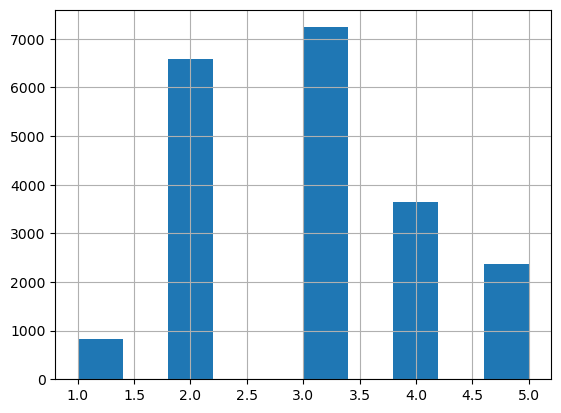

In [96]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()


https://en.wikipedia.org/wiki/Stratified_sampling, fun-fact:Simpson Paradox

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can
just work directly on the full set. Let’s create a copy so you can play with it without
harming the training set: 

In [98]:
housing = strat_train_set.copy()

Let's look at latitude and longitude - on the plot the shape really resemles California :)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

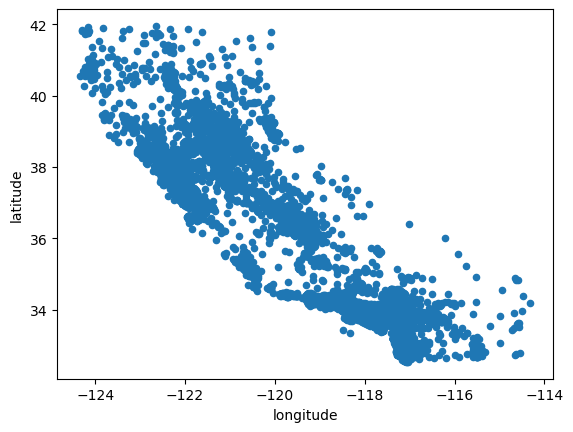

In [99]:
housing.plot(kind="scatter", x="longitude", y="latitude")


Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points. Alpha parameter is transparency parameter. Many points with low transparency in one place creates a clearly visible point.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

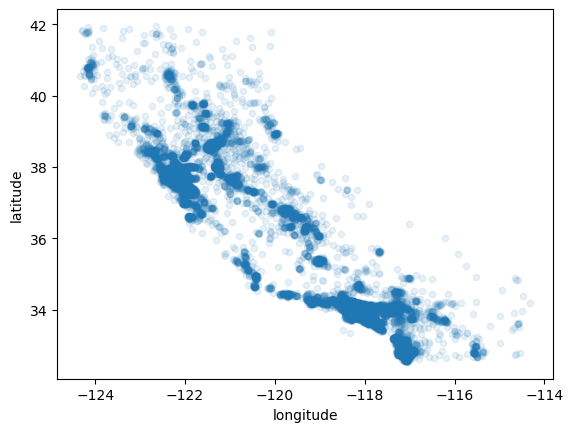

In [100]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now let’s look at the housing prices. The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

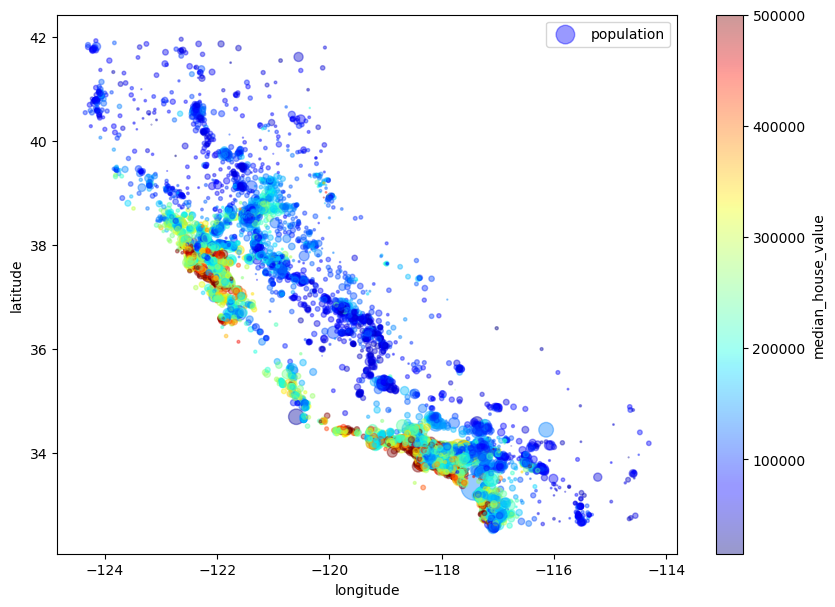

In [101]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


for more templates  https://matplotlib.org/stable/gallery/color/colormap_reference.html

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean prox‐
imity attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule

## Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [102]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships (e.g., “if x is close to zero then y gen‐
erally goes up”). 

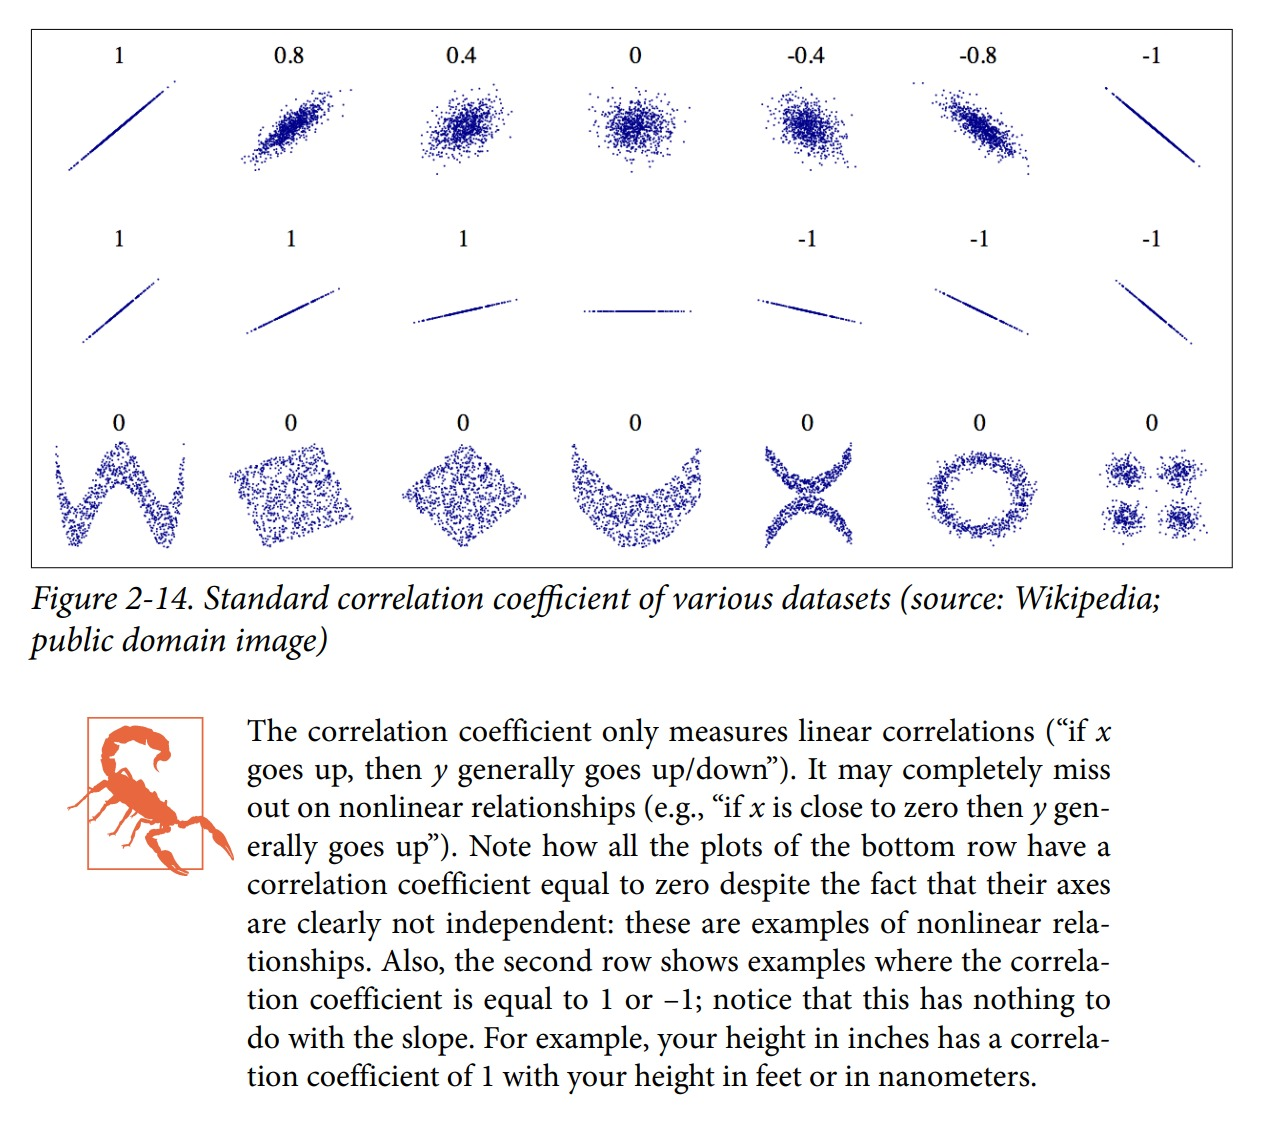

In [103]:
from IPython.display import Image
Image("correlation.jpeg")

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 11x11
 =
121 plots, which would not fit on a page, so let’s just focus on a few promising
attributes that seem most correlated with the median housing value. The main diagonal (top left to bottom right) would be full of straight lines if Pandas
plotted each variable against itself, which would not be very useful. So instead Pandas
displays a histogram of each attribute (other options are available; see Pandas’ documentation for more details).

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

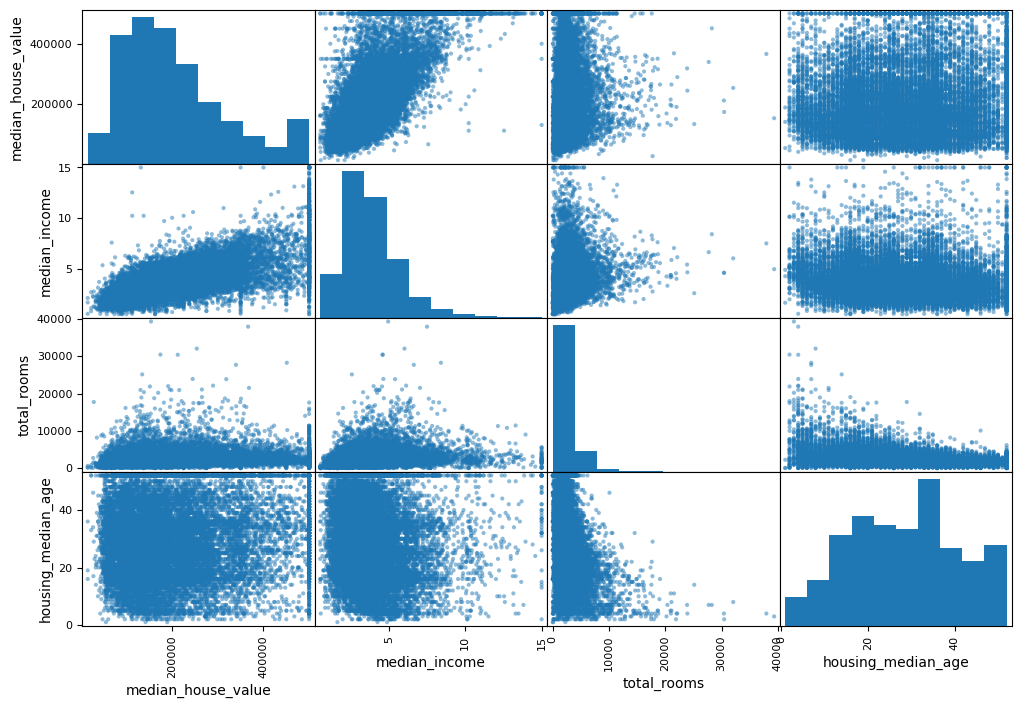

In [104]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot. This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this
plot reveals other less obvious straight lines: a horizontal line around $450,000,
another around $350,000, perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

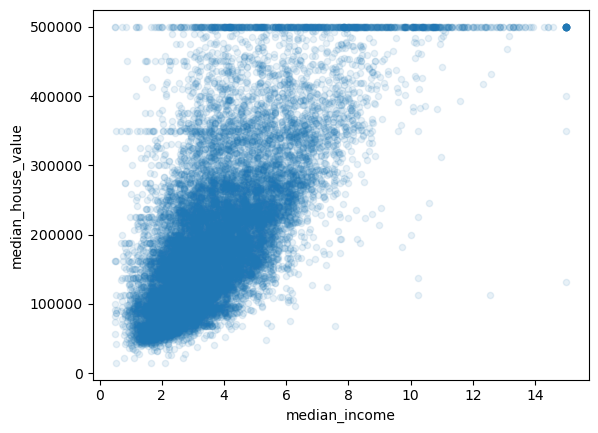

In [105]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


The total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at.

The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.



In [106]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [107]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
#let’s revert to a clean training set (by copying strat_train_set once again),
#and let’s separate the predictors and the labels since we don’t necessarily want to apply
#the same transformations to the predictors and the target values (note that drop()
#creates a copy of the data and does not affect strat_train_set):


## Data Cleaning

You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:

    1)Get rid of the corresponding districts
    2)Get rid of the whole attribute
    3)Set the values to some value (zero, the mean, the median, etc.)

In [108]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)


If you choose option 3, you should compute the median value on the training set, and
use it to fill the missing values in the training set, but also don’t forget to save the
median value that you have computed. You will need it later to replace missing values
in the test set when you want to evaluate your system, and also once the system goes
live to replace missing values in new data.
Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute:

In [109]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1) #median can only be computed on numerical attributes
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes

In [110]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [111]:
 housing_num.median().values

C:\Users\PC\AppData\Local\Temp\ipykernel_4480\786631837.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians:

In [112]:
X = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to
put it back into a Pandas DataFrame, it’s simple:

In [113]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

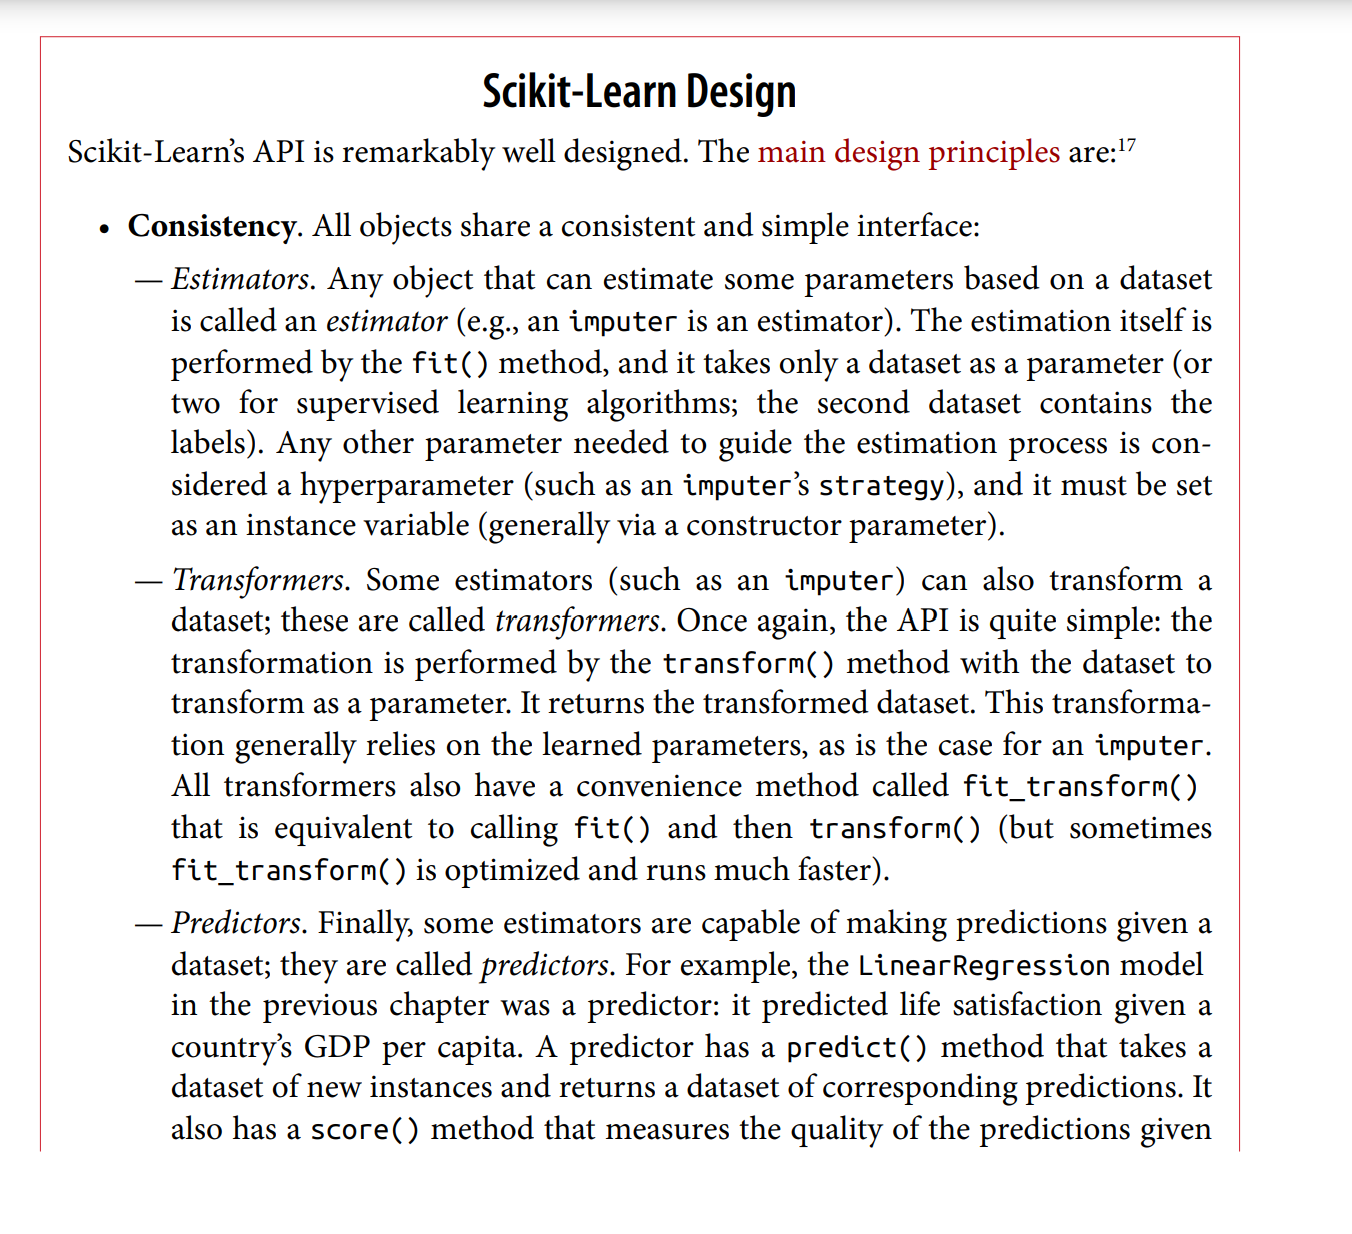

In [114]:
Image("scikit_learndesign1.png")

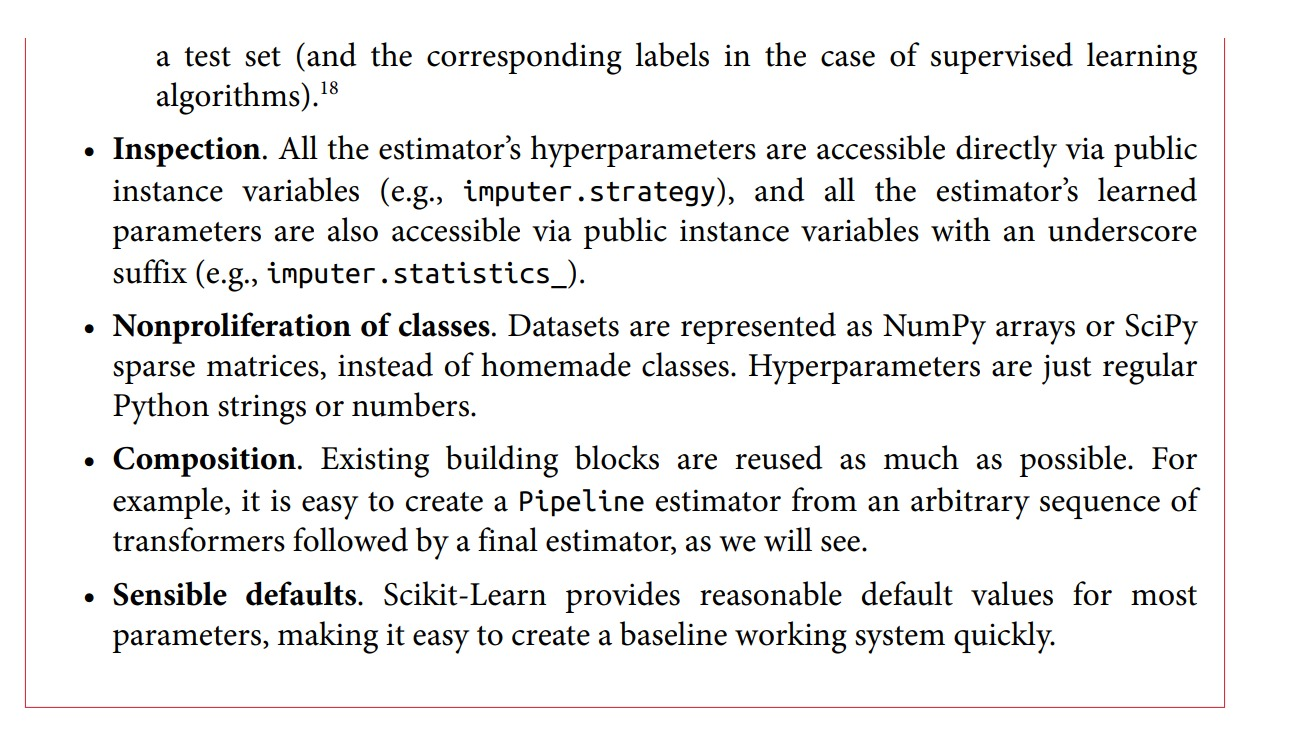

In [115]:
Image("scikit-learndesign2.jpeg")

## Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text
attribute so we cannot compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers.

In [116]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [117]:
housing_cat.head(10) #przed zakodowaniem

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [118]:
from array import array

ordinal_encoder.categories_
#You can get the list of categories using the categories_ instance variable. It is a list
#containing a 1D array of categories for each categorical attribute (in this case, a list
#containing a single array since there is just one categorical attribute):


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column (for example, categories 0 and 4 are
clearly more similar than categories 0 and 1). To fix this issue, a common solution is
to create one binary attribute per category: one attribute equal to 1 when the category
is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
“INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because
only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEn
coder class to convert categorical values into one-hot vectors

In [119]:
 from sklearn.preprocessing import OneHotEncoder
 cat_encoder = OneHotEncoder()
 housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
 housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After one hot encoding we get a matrix with thousands of columns, and the matrix is full of
zeros except for a single 1 per row. Using up tons of memory mostly to store zeros
would be very wasteful, so instead a sparse matrix only stores the location of the non‐zero elements. You can use it mostly like a normal 2D array,21 but if you really want to
convert it to a (dense) NumPy array, just call the toarray() method:


In [120]:
housing_cat_1hot.toarray()[:10]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [121]:
 cat_encoder.categories_ #to encode categories


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [122]:
#transformer example
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
     self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
     return self # nothing else to do
 def transform(self, X, y=None):
     rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
     population_per_household = X[:, population_ix] / X[:, households_ix]
     if self.add_bedrooms_per_room:
         bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
         return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
     else:
         return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


## Feature scaling

There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.

**Min-max scaling** (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
ing the min value and dividing by the max minus the min.  
Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason

**Standardization** is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range

## Transformation Pipelines

There are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)



The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like (as long as they are
unique and don’t contain double underscores “__”): they will come in handy later for
hyperparameter tuning.
When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method. The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler, which is a transformer, so the pipeline has a trans
form() method that applies all the transforms to the data in sequence (and of course
also a fit_transform() method, which is the one we used)

So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news
is that it works great with Pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [124]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)


## Select and Train a Model

#### Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [126]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


It works, although the predictions are not exactly accurate (e.g., the first prediction is
off by close to 40%!). Let’s measure this regression model’s RMSE on the whole train‐
ing set using Scikit-Learn’s mean_squared_error function

In [127]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

Okay, this is better than nothing but clearly not a great score: most districts’
median_housing_values range between $120,000 and $265,000, so a typical predic‐
tion error of $68,628 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough. As we saw in the previous chapter, the main ways to fix underfitting are to
select a more powerful model, to feed the training algorithm with better features, or
to reduce the constraints on the model. This model is not regularized, so this rules
out the last option. You could try to add more features (e.g., the log of the popula‐
tion), but first let’s try a more complex model to see how it does

#### DecisionTree Regressor

In [129]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.

#### Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the vali‐
dation set. It’s a bit of work, but nothing too difficult and it would work fairly well.
A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The follow‐
ing code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array con‐
taining the 10 evaluation scores:

In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)


Scores: [74603.72008911 70508.00785091 69195.61319423 72680.32450563
 70298.38155218 77873.78037847 70961.3730992  73124.02635636
 68240.93502791 69867.6537307 ]
Mean: 71735.38157846998
Standard deviation: 2739.5081495866566


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐
form worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,407, generally ±2,439. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible

In [132]:
#linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861


In [137]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_reg_scores)

display_scores(forest_rmse_scores)


Scores: [51652.69665567 48991.08240893 47139.6532142  51997.71474758
 47696.39726852 51896.7500352  52210.03157964 50037.90237566
 48815.39676541 53483.73611777]
Mean: 50392.13611685725
Standard deviation: 2042.3928643334416


Wow, this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.
However, before you dive much deeper in Random Forests, you should try out many
other models from various categories of Machine Learning algorithms (several Sup‐
port Vector Machines with different kernels, possibly a neural network, etc.), without
spending too much time tweaking the hyperparameters. The goal is to shortlist a few
(two to five) promising models.

 **source**: *Hands on Machine Learning with Sci-kit Learn, Keras & Tesnsorflow*,
    Aurelien Geron
    
    https://github.com/ageron/handson-ml2